# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Import Data

In [2]:
df = pd.read_csv('CC General.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Preprocessing

In [4]:
df.duplicated().any()

False

In [5]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isna().sum()).reset_index()
    miss1.columns = ['columns', 'Total']
    miss2 = pd.DataFrame(df.isna().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', '%']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Total']!=0]
missing_data(df) 

,columns,Total,%
13,CREDIT_LIMIT,1,0.011173
15,MINIMUM_PAYMENTS,313,3.497207


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

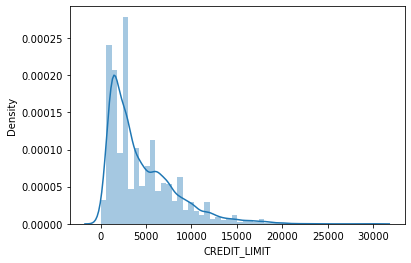

In [6]:
sns.distplot(df['CREDIT_LIMIT'], kde=True)

In [7]:
mean_age = round(df['CREDIT_LIMIT'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(mean_age)

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

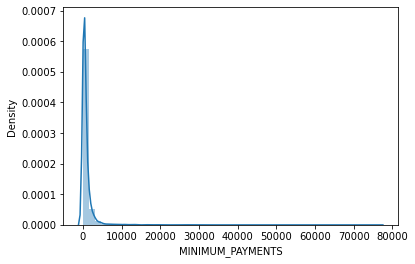

In [8]:
sns.distplot(df['MINIMUM_PAYMENTS'], kde=True)

In [9]:
mean_age = round(df['MINIMUM_PAYMENTS'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(mean_age)

In [10]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df = df.drop(['CUST_ID'], axis=1)

scaler = MinMaxScaler()
df_new = scaler.fit_transform(df)


df_final = pd.DataFrame(df_new)
df_final.columns = df.columns

df_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011308,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011308,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


# Defining Number of Cluster (K) Using Elbow Method

In [12]:
inertia = []
for i in range(1,10):
  model = KMeans(n_clusters=i, random_state=42)
  model.fit(df_final)
  inertia.append(model.inertia_)
inertia

[5935.39676101047,
 3508.1469517526116,
 2927.5863501792064,
 2551.6333233633623,
 2262.7199309074417,
 2059.602772698242,
 1857.9408767604605,
 1700.074383979248,
 1577.5925802948518]

In [13]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1,10)])
inertia_df

,Inertia
1,5935.396761
2,3508.146952
3,2927.586350
4,2551.633323
5,2262.719931
6,2059.602773
7,1857.940877
8,1700.074384
9,1577.592580


Text(0.5, 1.0, 'Elbow Method')

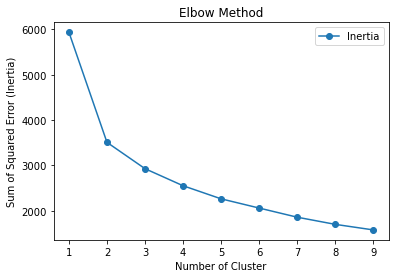

In [14]:
inertia_df.plot(kind='line', marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.title('Elbow Method')

# Fitting Model KMeans

In [15]:
modelKM = KMeans(n_clusters=3, random_state=42)
modelKM.fit(df_final)

KMeans(n_clusters=3, random_state=42)

In [16]:
modelKM.predict(df_final)

array([0, 0, 2, ..., 1, 0, 2])

In [17]:
df_final['Cluster KM'] = modelKM.predict(df_final)
df_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011308,0.000000,1.0,0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,1
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011308,0.000000,0.0,1
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,1
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,0


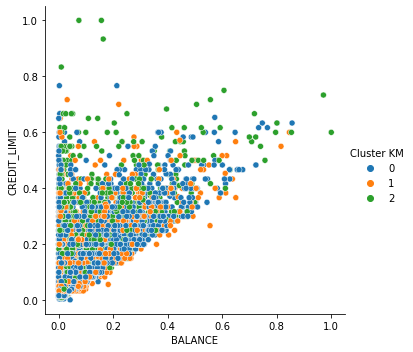

In [18]:
sns.relplot(x='BALANCE',y='CREDIT_LIMIT',data=df_final, hue='Cluster KM', palette='tab10')

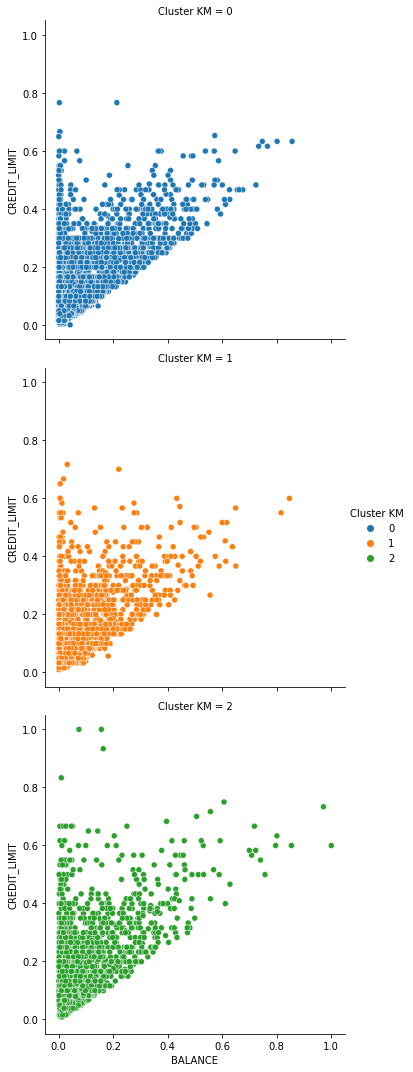

In [19]:
sns.relplot(x='BALANCE',y='CREDIT_LIMIT',data=df_final, hue='Cluster KM', palette='tab10', row='Cluster KM')

In [20]:
modelKM.cluster_centers_

array([[0.08951182, 0.82619325, 0.00603185, 0.00571362, 0.00280417,
        0.02878223, 0.14326466, 0.08154259, 0.06063506, 0.12384564,
        0.0359427 , 0.00747776, 0.13667966, 0.02910741, 0.01114287,
        0.06840531, 0.90783069],
       [0.05984046, 0.91400145, 0.02174957, 0.00659921, 0.03547744,
        0.01067294, 0.87099284, 0.09866736, 0.81998   , 0.04715823,
        0.01407422, 0.05816522, 0.13011289, 0.02744998, 0.0121833 ,
        0.23782497, 0.91918284],
       [0.1010818 , 0.97370607, 0.06519944, 0.05871543, 0.03573504,
        0.01397872, 0.89300748, 0.79848575, 0.48096273, 0.06236697,
        0.01899836, 0.11822437, 0.22200658, 0.06370167, 0.01017572,
        0.2708953 , 0.95865096]])

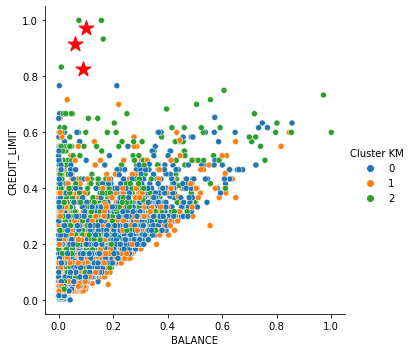

In [21]:
sns.relplot(x='BALANCE',y='CREDIT_LIMIT',data=df_final, hue='Cluster KM', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:,0], modelKM.cluster_centers_[:,1], color='red', marker='*', s=250)

# Hierarchical Clustering

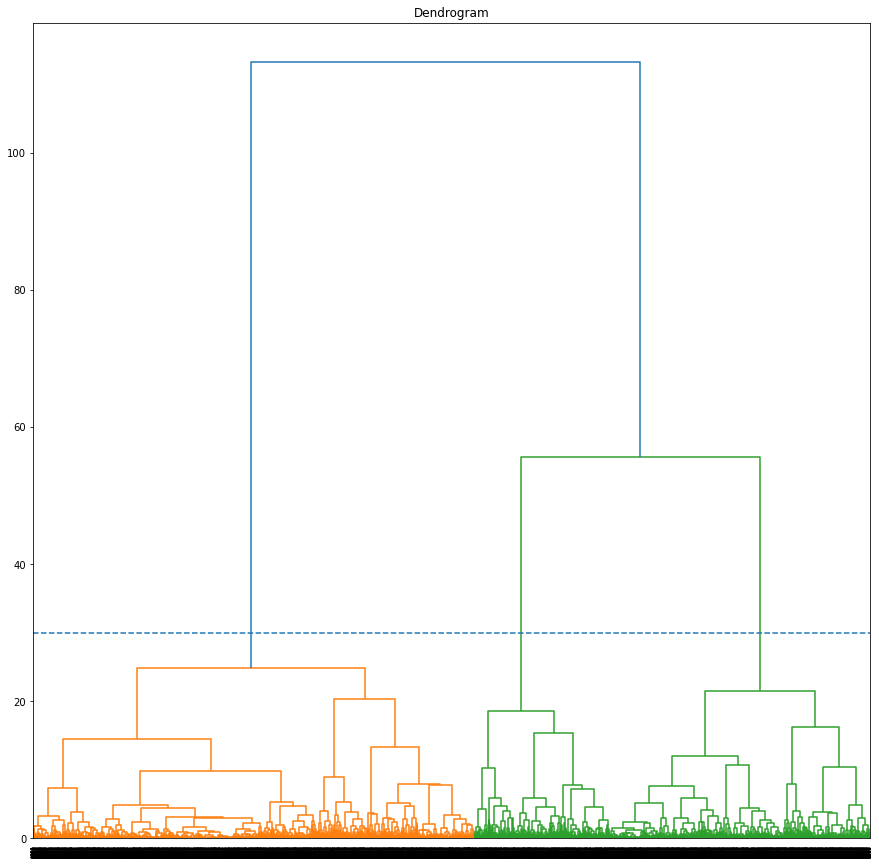

In [22]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,15))
plt.title('Dendrogram')
plt.axhline(y=30, linestyle='--')
dend = sch.dendrogram(sch.linkage(df_final, method='ward'))

In [23]:
from sklearn.cluster import AgglomerativeClustering as AC
cluster = AC(n_clusters=3)

In [24]:
cluster.fit_predict(df_final)

array([0, 0, 2, ..., 1, 0, 2], dtype=int64)

In [25]:
df_final['Cluster AC'] = cluster.fit_predict(df_final)
df_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM,Cluster AC
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0,0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0,0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2,2
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011308,0.000000,1.0,0,0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,1,1
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011308,0.000000,0.0,1,1
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,1,1
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,0,0


In [26]:
df_final['Cluster KM'].value_counts()

0    4724
1    2783
2    1443
Name: Cluster KM, dtype: int64

In [27]:
df_final['Cluster AC'].value_counts()

0    4724
1    2783
2    1443
Name: Cluster AC, dtype: int64

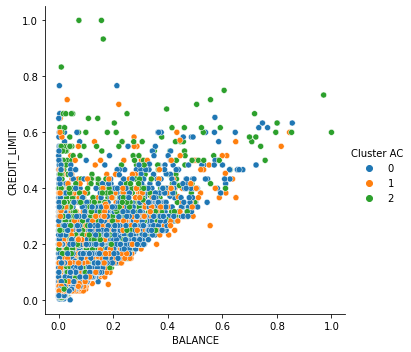

In [28]:
sns.relplot(x='BALANCE',y='CREDIT_LIMIT',data=df_final, hue='Cluster AC', palette='tab10')

In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

siluet_km = silhouette_score(df_final, df_final['Cluster KM'])
siluet_ac = silhouette_score(df_final, df_final['Cluster AC'])

calinski_km = calinski_harabasz_score(df_final, df_final['Cluster KM'])
calinski_ac = calinski_harabasz_score(df_final, df_final['Cluster AC'])

dbi_km = davies_bouldin_score(df_final, df_final['Cluster KM'])
dbi_ac = davies_bouldin_score(df_final, df_final['Cluster AC'])

model_selection = pd.DataFrame({'Before PCA K Means':[siluet_km, calinski_km, dbi_km], 'Before PCA Agglomerative':[siluet_ac, calinski_ac, dbi_ac]},
                               index=['Silhouette Score', 'Calinski Score', 'Davies Bouldin Score'])

In [30]:
model_selection

,Before PCA K Means,Before PCA Agglomerative
Silhouette Score,0.607234,0.607234
Calinski Score,19767.220242,19767.220242
Davies Bouldin Score,0.678059,0.678059


# PCA KMeans

In [31]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_final.drop(['Cluster KM','Cluster AC'], axis=1))
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

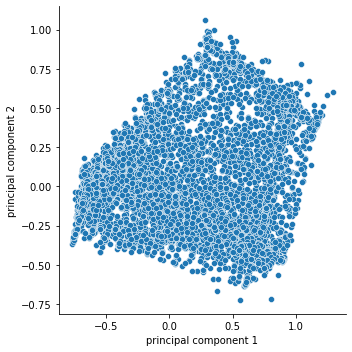

In [33]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, palette='tab10')

In [34]:
modelKM = KMeans(n_clusters=3, random_state=42)
modelKM.fit(principalDf)

KMeans(n_clusters=3, random_state=42)

In [35]:
principalDf['Cluster PCA KM'] = modelKM.predict(principalDf)

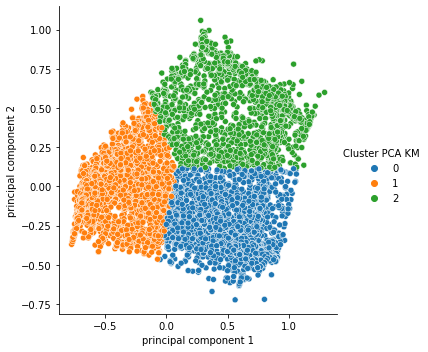

In [36]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, hue='Cluster PCA KM', palette='tab10')

In [37]:
modelKM.cluster_centers_

array([[ 0.54540069, -0.26709089],
       [-0.49220798, -0.00407309],
       [ 0.54648995,  0.49376831]])

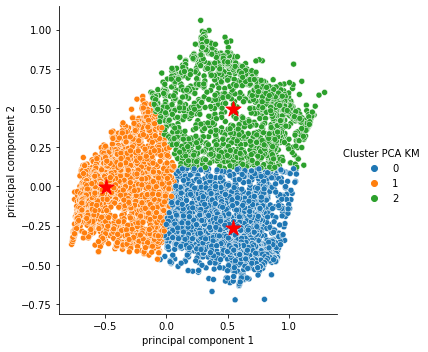

In [38]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, hue='Cluster PCA KM', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:,0], modelKM.cluster_centers_[:,1], color='red', marker='*', s=250)

# PCA Hierarchical 

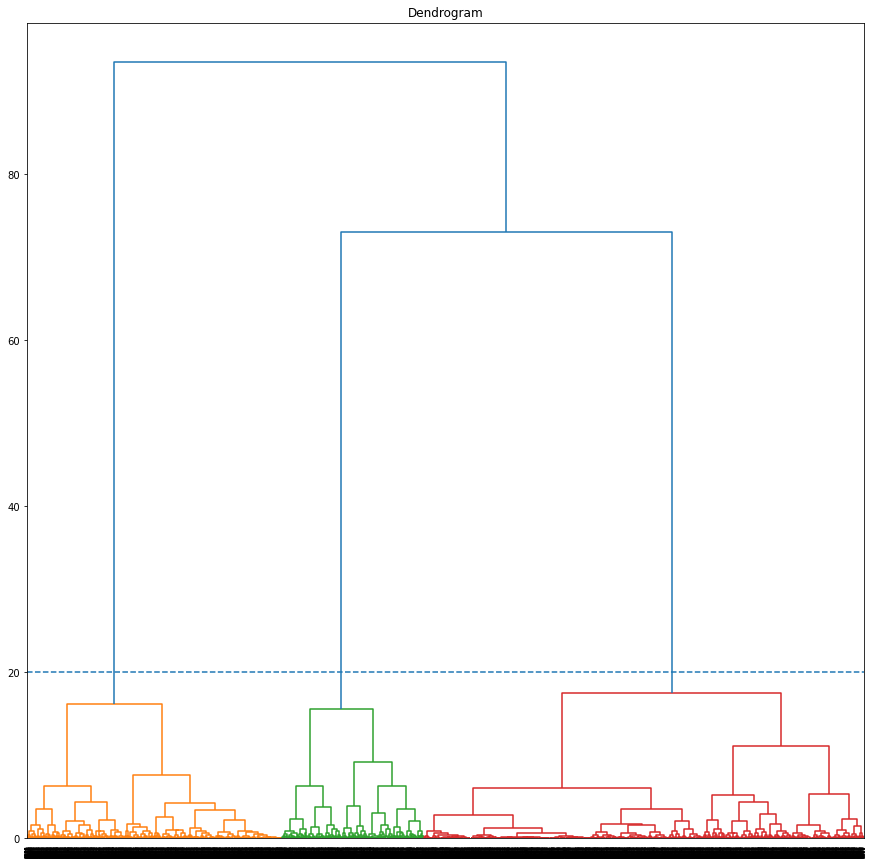

In [39]:
plt.figure(figsize=(15,15))
plt.title('Dendrogram')
plt.axhline(y=20, linestyle='--')
dend = sch.dendrogram(sch.linkage(principalDf, method='ward'))

In [40]:
cluster = AC(n_clusters=3)

In [41]:
cluster = AC(n_clusters=3) 
principalDf['Cluster PCA AC'] = cluster.fit_predict(principalDf)

In [42]:
principalDf['Cluster PCA KM'].value_counts()

1    4706
0    2725
2    1519
Name: Cluster PCA KM, dtype: int64

In [43]:
principalDf['Cluster PCA AC'].value_counts()

0    4706
1    2725
2    1519
Name: Cluster PCA AC, dtype: int64

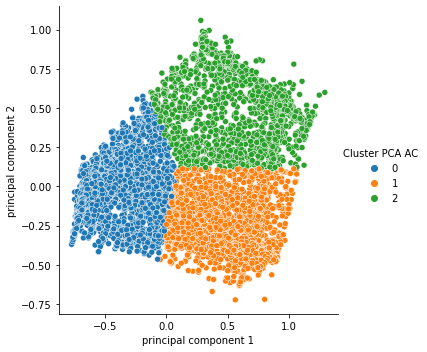

In [44]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, hue='Cluster PCA AC', palette='tab10')

In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

siluet_km = silhouette_score(principalDf, principalDf['Cluster PCA KM'])
siluet_ac = silhouette_score(principalDf, principalDf['Cluster PCA AC'])

calinski_km = calinski_harabasz_score(principalDf, principalDf['Cluster PCA KM'])
calinski_ac = calinski_harabasz_score(principalDf, principalDf['Cluster PCA AC'])

dbi_km = davies_bouldin_score(principalDf, principalDf['Cluster PCA KM'])
dbi_ac = davies_bouldin_score(principalDf, principalDf['Cluster PCA AC'])

model_selection2 = pd.DataFrame({'After PCA K Means':[siluet_km, calinski_km, dbi_km], 'After PCA Agglomerative':[siluet_ac, calinski_ac, dbi_ac]},
                               index=['Silhouette Score', 'Calinski Score', 'Davies Bouldin Score'])
result = pd.concat([model_selection, model_selection2], axis=1)

In [46]:
result

,Before PCA K Means,Before PCA Agglomerative,After PCA K Means,After PCA Agglomerative
Silhouette Score,0.607234,0.607234,0.810661,0.810661
Calinski Score,19767.220242,19767.220242,67091.472136,67091.472136
Davies Bouldin Score,0.678059,0.678059,0.278124,0.278124


In [47]:
result_df = pd.concat([df_final, principalDf[['Cluster PCA KM', 'Cluster PCA AC']]], axis=1)

In [48]:
result_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM,Cluster AC,Cluster PCA KM,Cluster PCA AC
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0,0,1,0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0,0,1,0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2,2,2,2
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,...,0.002793,0.248748,0.000000,0.011308,0.000000,1.0,0,0,1,0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,1,1,0,1
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.016760,0.031720,0.005439,0.011308,0.000000,0.0,1,1,0,1
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,1,1,0,1
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,0,0,1,0


# Validation About Data

### Cluster KM Overview

In [49]:
result_df_km = result_df.copy().drop(columns=['Cluster AC', 'Cluster PCA KM', 'Cluster PCA AC'])

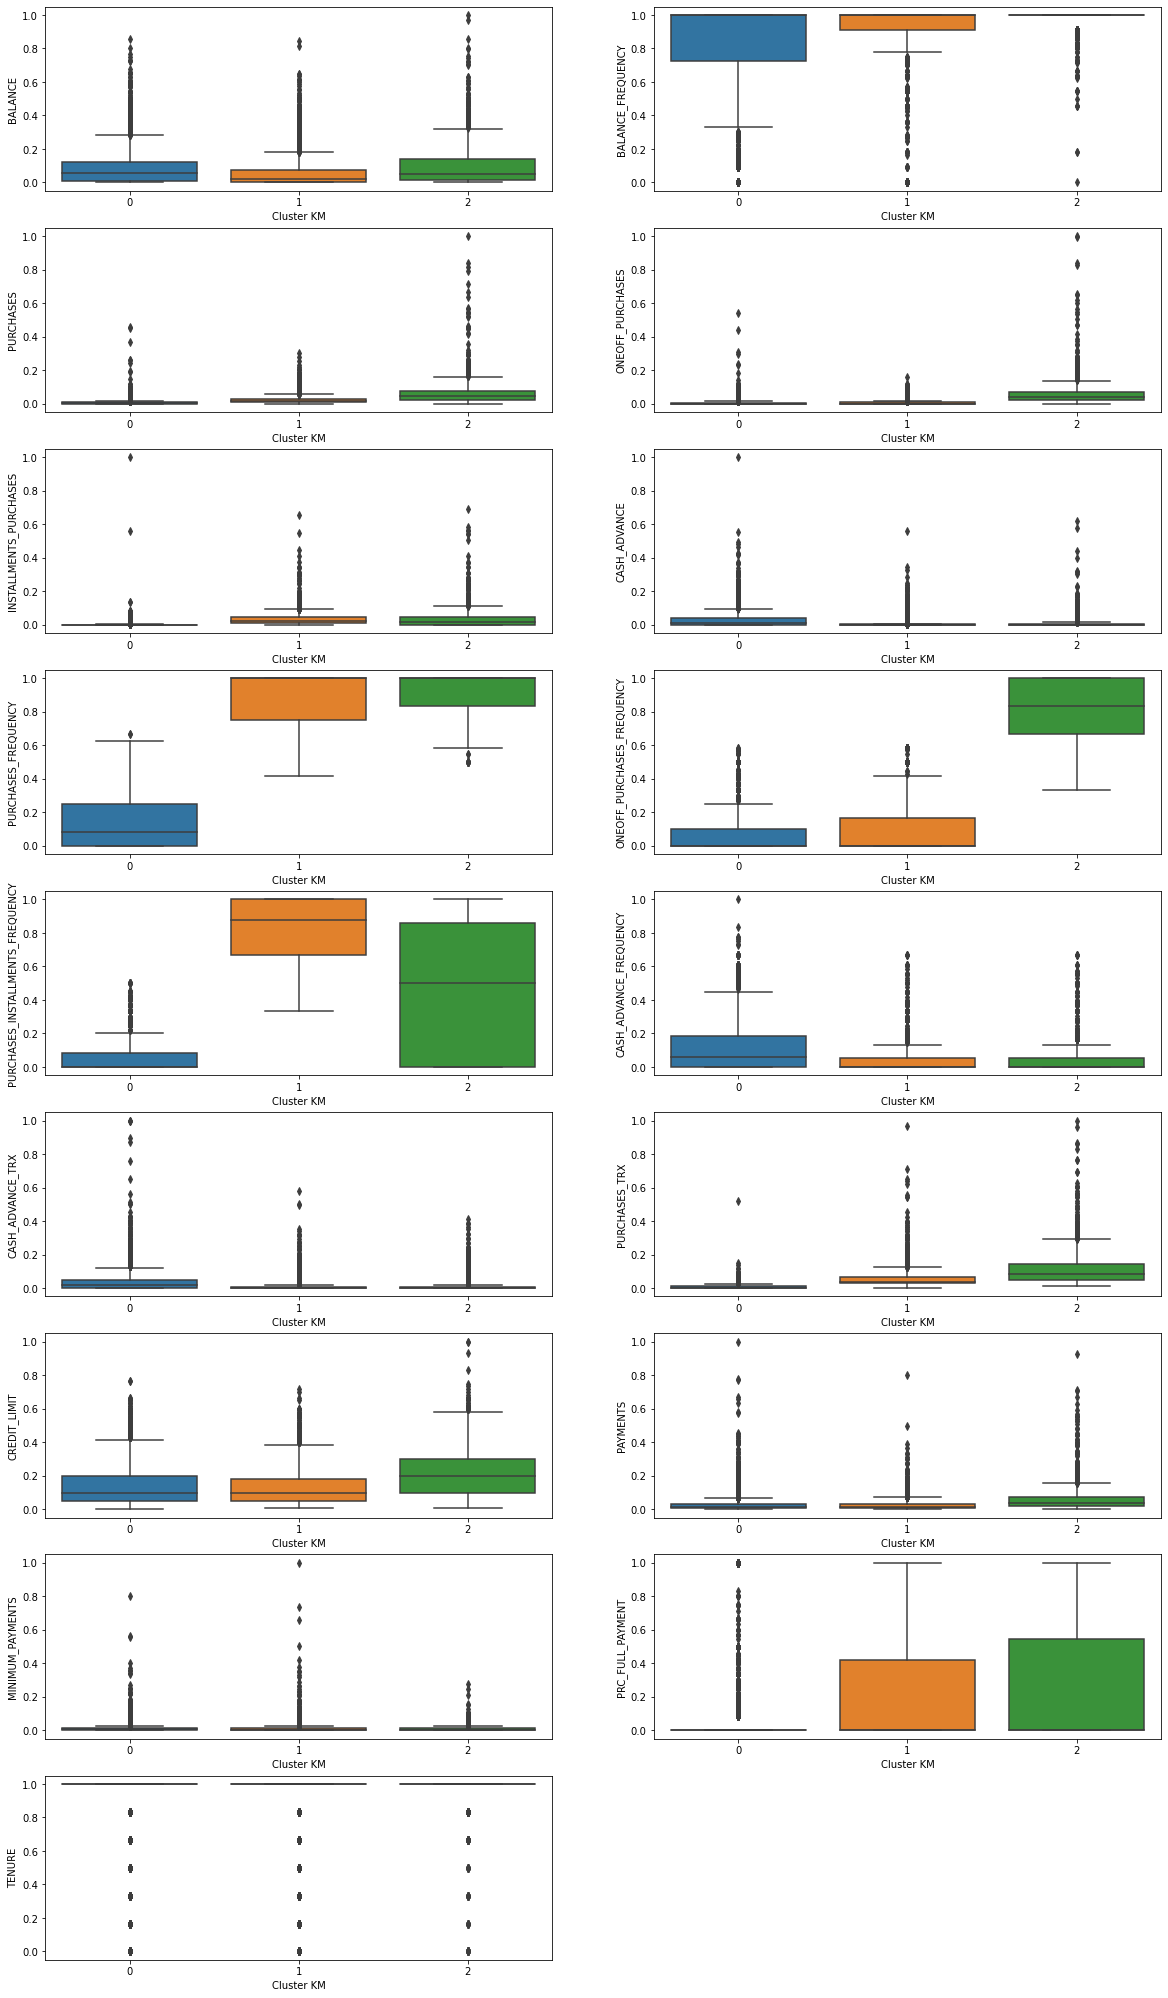

In [50]:
count=1
plt.subplots(figsize=(20, 40))
for col in result_df_km.columns[:-1]:
    plt.subplot(10,2,count)
    sns.boxplot(x='Cluster KM', y=col, data=result_df_km)
    count+=1
plt.show()

In [51]:
pd.DataFrame({'index': result_df_km.columns[:-1],
             'cluster_0': result_df_km[result_df_km['Cluster KM']==0].describe().loc['mean'].values[:-1],
             'cluster_1': result_df_km[result_df_km['Cluster KM']==1].describe().loc['mean'].values[:-1],
              'cluster_2':result_df_km[result_df_km['Cluster KM']==2].describe().loc['mean'].values[:-1],
             'Mean':result_df_km.mean().values[:-1]})

,index,cluster_0,cluster_1,cluster_2,Mean
0,BALANCE,0.089530,0.059820,0.101082,0.082154
1,BALANCE_FREQUENCY,0.826253,0.913869,0.973706,0.877271
2,PURCHASES,0.006030,0.021747,0.065199,0.020457
3,ONEOFF_PURCHASES,0.005714,0.006598,0.058715,0.014534
4,INSTALLMENTS_PURCHASES,0.002799,0.035474,0.035735,0.018270
5,CASH_ADVANCE,0.028788,0.010669,0.013979,0.020766
6,PURCHASES_FREQUENCY,0.143189,0.870860,0.893007,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,0.081525,0.098692,0.798486,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.060560,0.819835,0.480963,0.364437
9,CASH_ADVANCE_FREQUENCY,0.123872,0.047141,0.062367,0.090096


### Cluster AC Overview

In [52]:
result_df_ac = result_df.copy().drop(columns=['Cluster KM', 'Cluster PCA KM', 'Cluster PCA AC'])

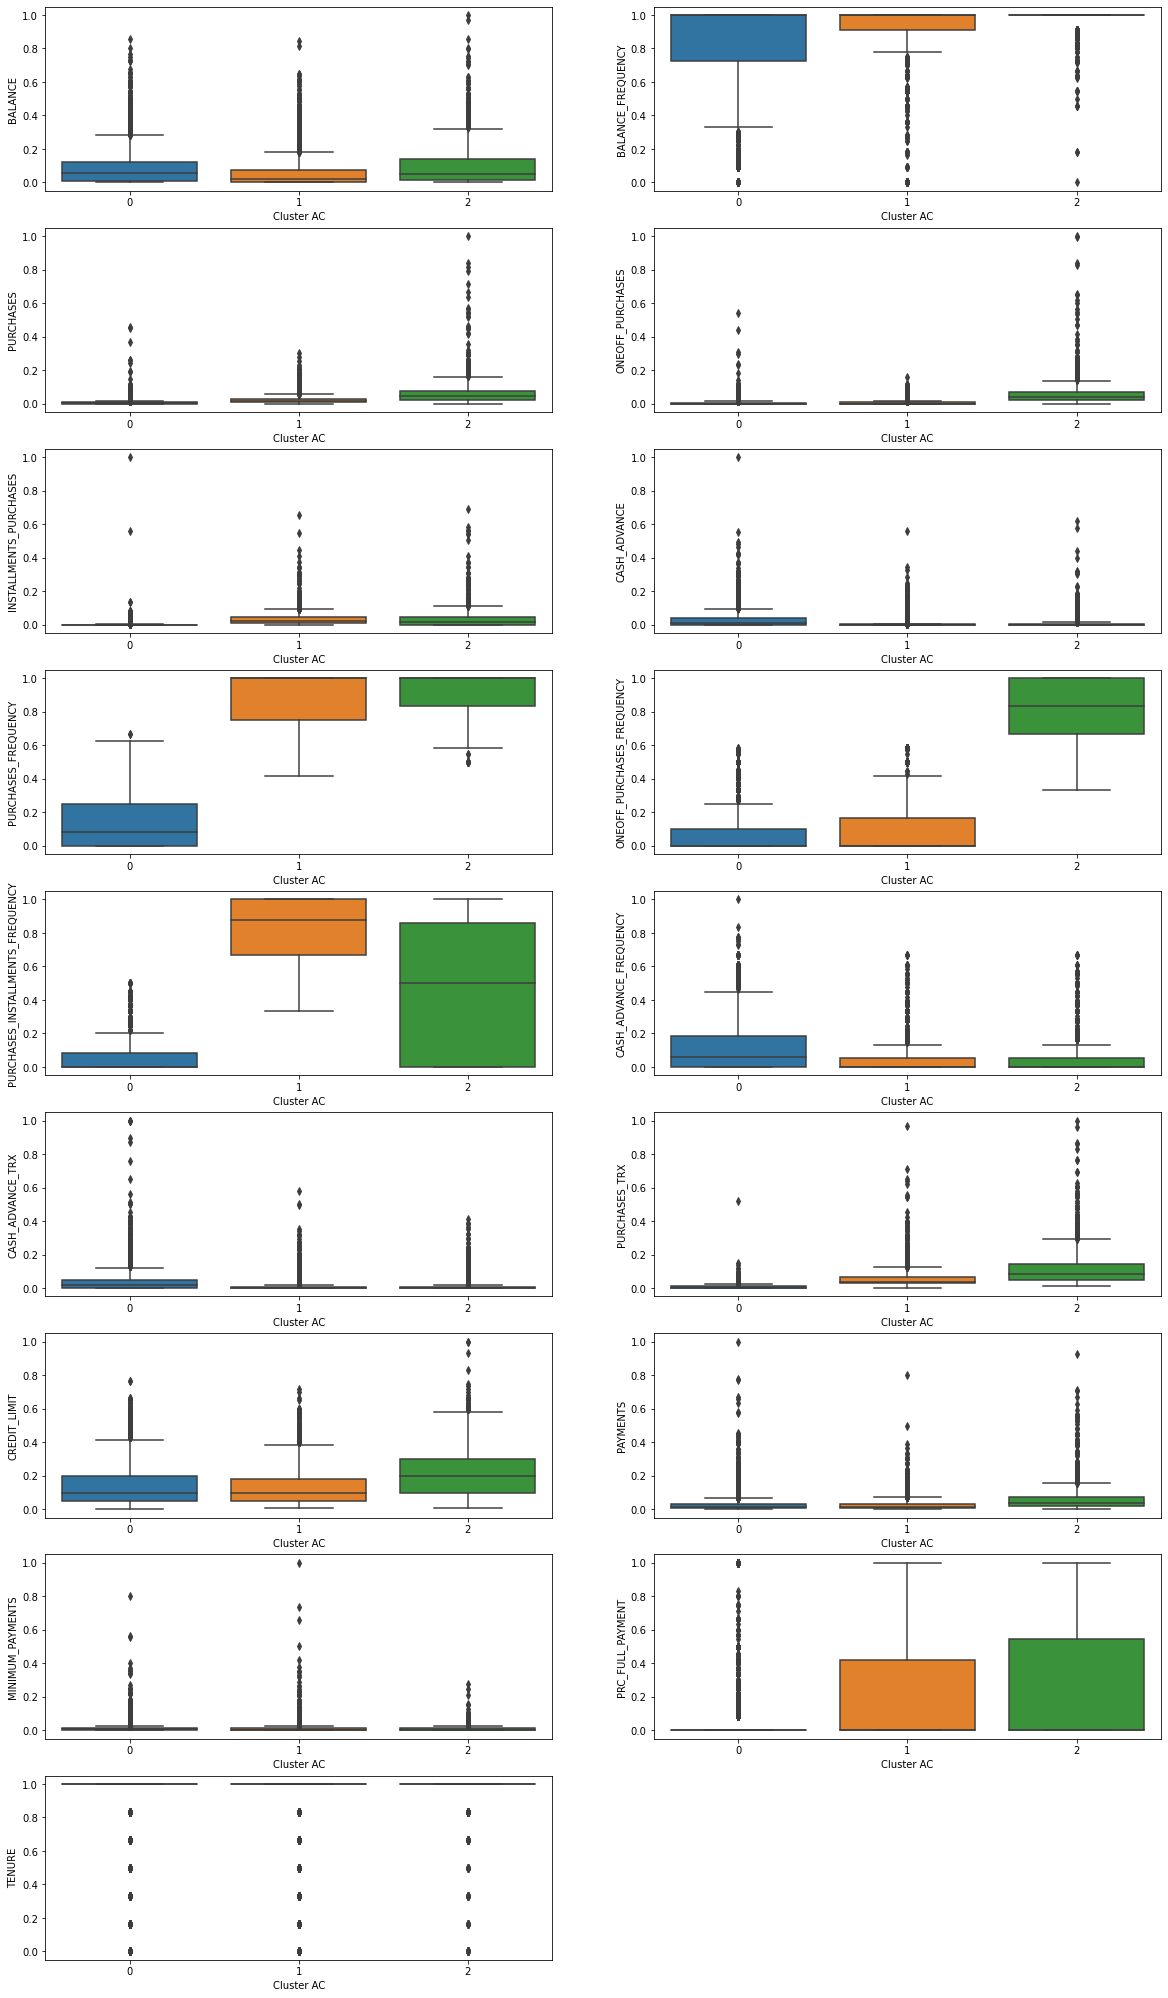

In [53]:
count=1
plt.subplots(figsize=(20, 40))
for col in result_df_ac.columns[:-1]:
    plt.subplot(10,2,count)
    sns.boxplot(x='Cluster AC', y=col, data=result_df_ac)
    count+=1
plt.show()

In [54]:
pd.DataFrame({'index': result_df_ac.columns[:-1],
             'cluster_0': result_df_ac[result_df_ac['Cluster AC']==0].describe().loc['mean'].values[:-1],
             'cluster_1': result_df_ac[result_df_ac['Cluster AC']==1].describe().loc['mean'].values[:-1],
              'cluster_2':result_df_ac[result_df_ac['Cluster AC']==2].describe().loc['mean'].values[:-1],
             'Mean':result_df_ac.mean().values[:-1]})

,index,cluster_0,cluster_1,cluster_2,Mean
0,BALANCE,0.089530,0.059820,0.101082,0.082154
1,BALANCE_FREQUENCY,0.826253,0.913869,0.973706,0.877271
2,PURCHASES,0.006030,0.021747,0.065199,0.020457
3,ONEOFF_PURCHASES,0.005714,0.006598,0.058715,0.014534
4,INSTALLMENTS_PURCHASES,0.002799,0.035474,0.035735,0.018270
5,CASH_ADVANCE,0.028788,0.010669,0.013979,0.020766
6,PURCHASES_FREQUENCY,0.143189,0.870860,0.893007,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,0.081525,0.098692,0.798486,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.060560,0.819835,0.480963,0.364437
9,CASH_ADVANCE_FREQUENCY,0.123872,0.047141,0.062367,0.090096


### Cluster PCA KM Overview

In [55]:
result_df_pca_km = result_df.copy().drop(columns=['Cluster KM', 'Cluster AC', 'Cluster PCA AC'])

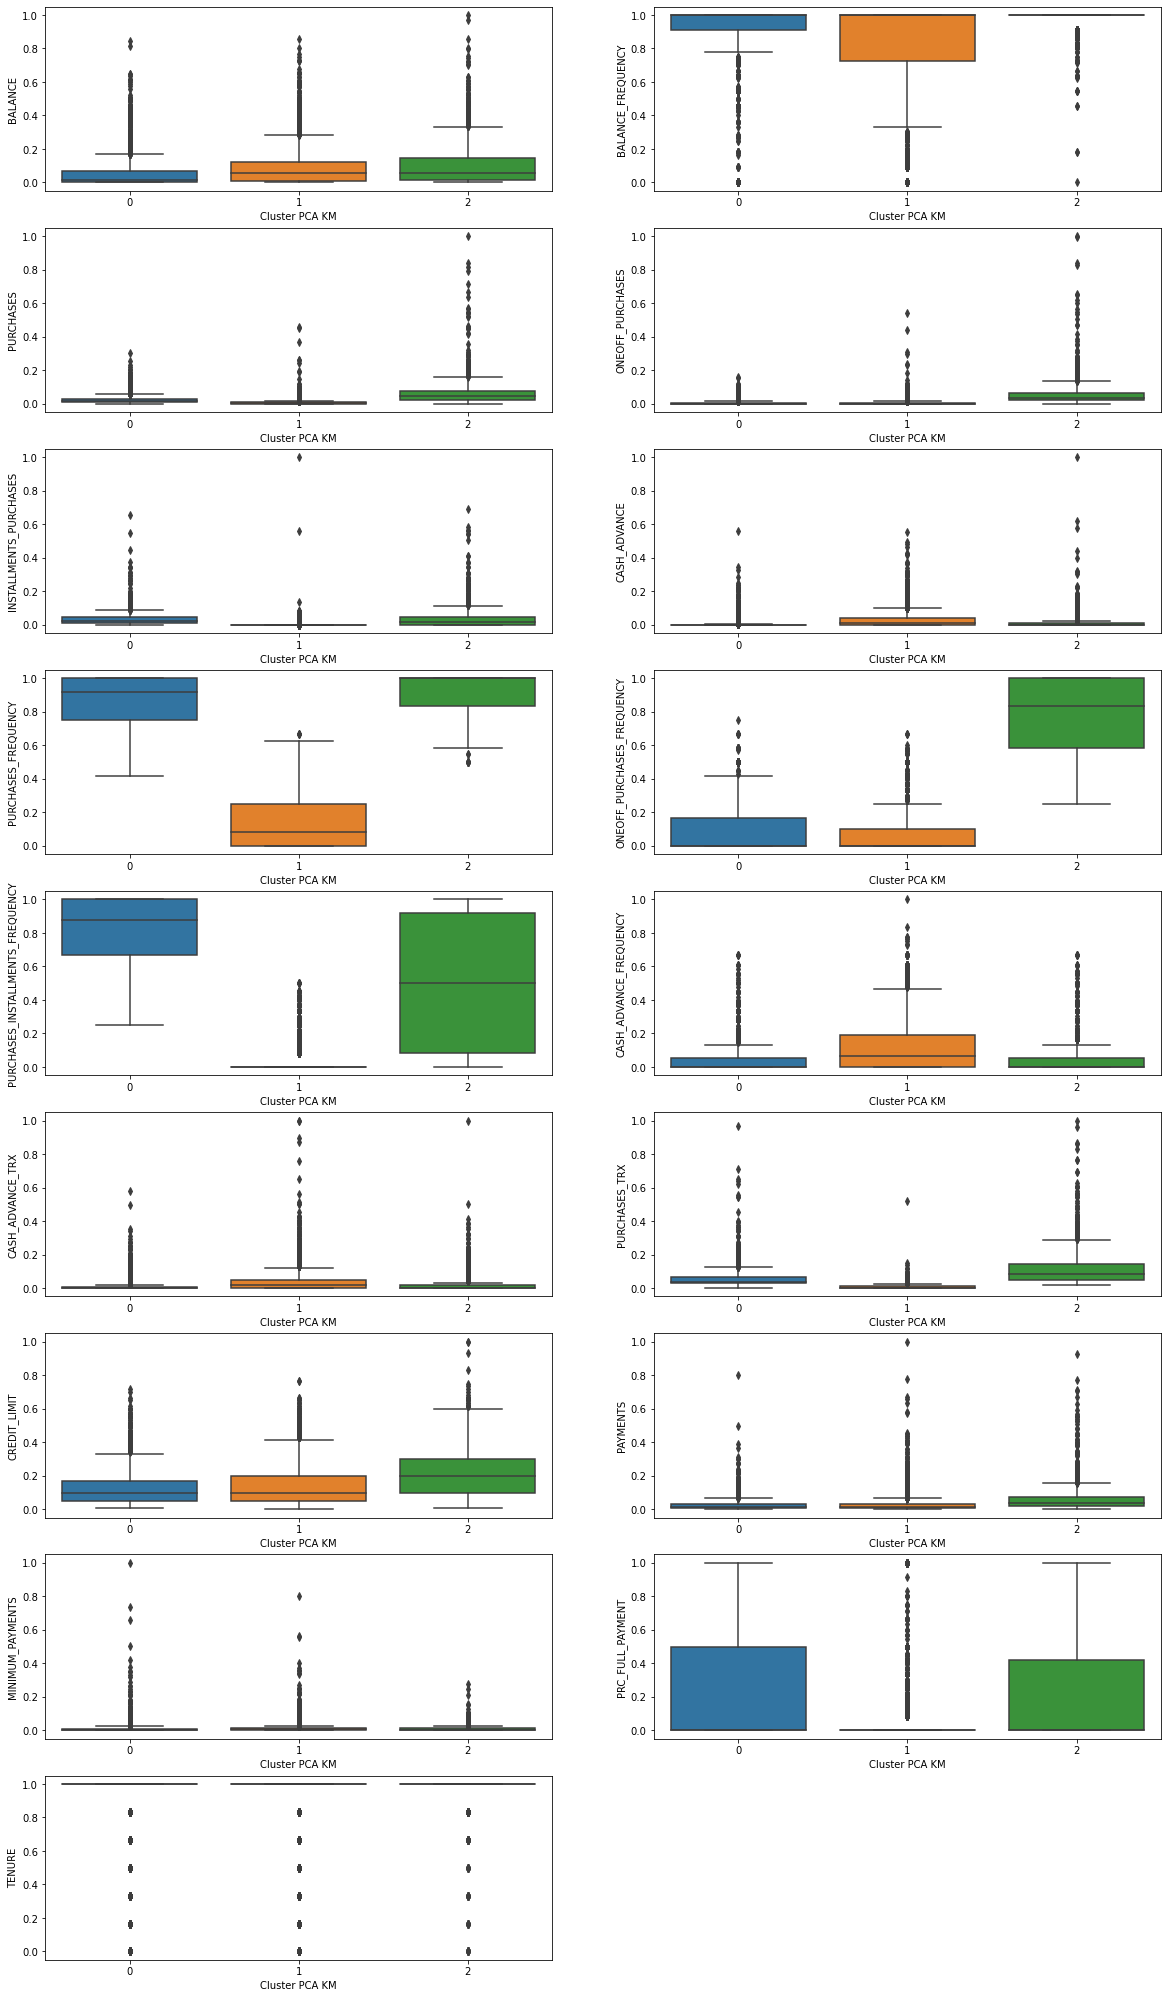

In [56]:
count=1
plt.subplots(figsize=(20, 40))
for col in result_df_pca_km.columns[:-1]:
    plt.subplot(10,2,count)
    sns.boxplot(x='Cluster PCA KM', y=col, data=result_df_pca_km)
    count+=1
plt.show()

In [57]:
pd.DataFrame({'index': result_df_pca_km.columns[:-1],
             'cluster_0': result_df_pca_km[result_df_pca_km['Cluster PCA KM']==0].describe().loc['mean'].values[:-1],
             'cluster_1': result_df_pca_km[result_df_pca_km['Cluster PCA KM']==1].describe().loc['mean'].values[:-1],
              'cluster_2':result_df_pca_km[result_df_pca_km['Cluster PCA KM']==2].describe().loc['mean'].values[:-1],
             'Mean':result_df_pca_km.mean().values[:-1]})

,index,cluster_0,cluster_1,cluster_2,Mean
0,BALANCE,0.055515,0.089959,0.105763,0.082154
1,BALANCE_FREQUENCY,0.907181,0.827560,0.977621,0.877271
2,PURCHASES,0.020785,0.006043,0.064525,0.020457
3,ONEOFF_PURCHASES,0.005856,0.005765,0.057270,0.014534
4,INSTALLMENTS_PURCHASES,0.034725,0.002733,0.036884,0.018270
5,CASH_ADVANCE,0.010029,0.028751,0.015293,0.020766
6,PURCHASES_FREQUENCY,0.866608,0.142124,0.894202,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,0.087408,0.082456,0.780627,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.816500,0.058709,0.500638,0.364437
9,CASH_ADVANCE_FREQUENCY,0.044343,0.124573,0.065362,0.090096


### Cluster PCA AC Overview

In [58]:
result_df_pca_ac = result_df.copy().drop(columns=['Cluster KM', 'Cluster AC', 'Cluster PCA KM'])

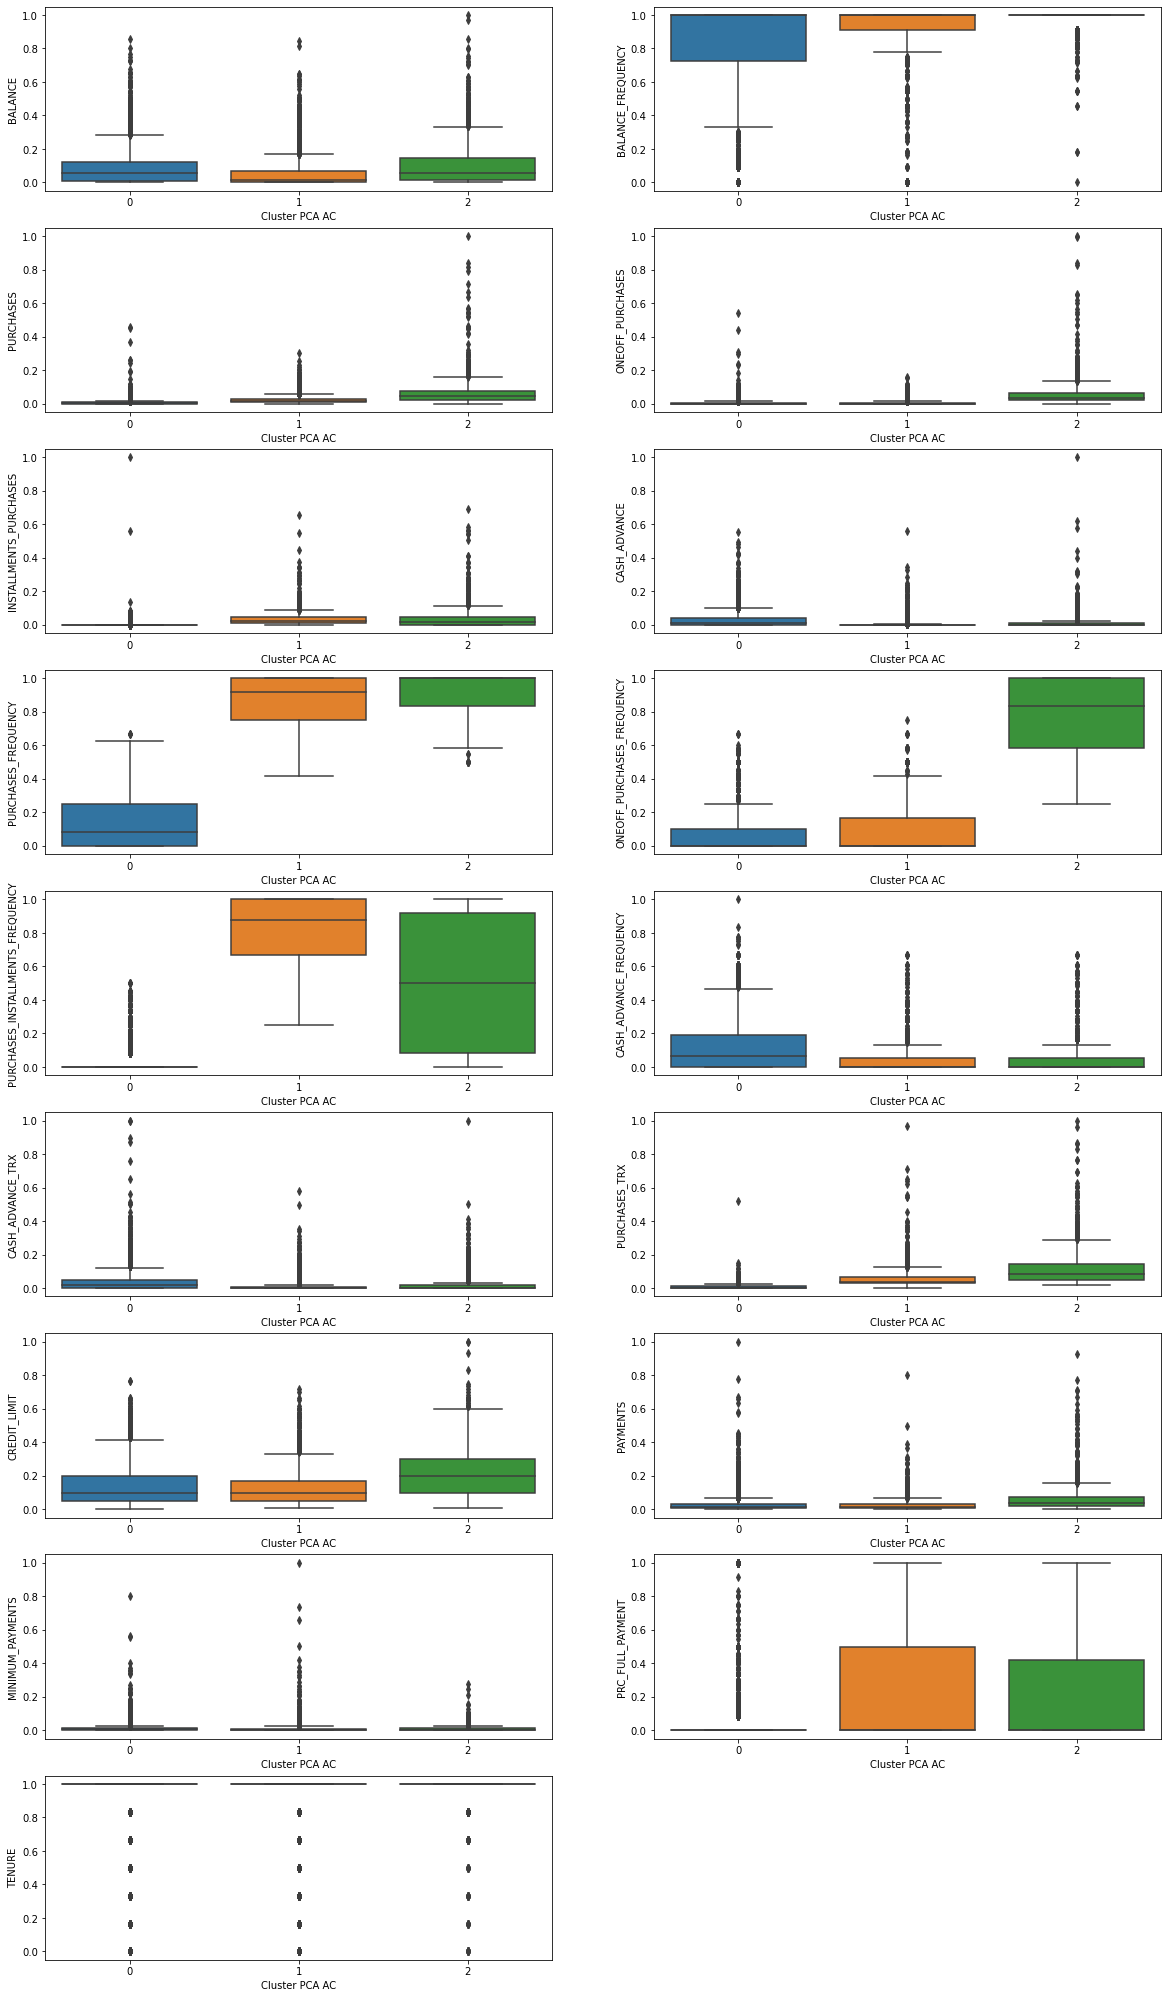

In [59]:
count=1
plt.subplots(figsize=(20, 40))
for col in result_df_pca_ac.columns[:-1]:
    plt.subplot(10,2,count)
    sns.boxplot(x='Cluster PCA AC', y=col, data=result_df_pca_ac)
    count+=1
plt.show()

In [60]:
pd.DataFrame({'index': result_df_pca_ac.columns[:-1],
             'cluster_0': result_df_pca_ac[result_df_pca_ac['Cluster PCA AC']==0].describe().loc['mean'].values[:-1],
             'cluster_1': result_df_pca_ac[result_df_pca_ac['Cluster PCA AC']==1].describe().loc['mean'].values[:-1],
              'cluster_2':result_df_pca_ac[result_df_pca_ac['Cluster PCA AC']==2].describe().loc['mean'].values[:-1],
             'Mean':result_df_pca_ac.mean().values[:-1]})

,index,cluster_0,cluster_1,cluster_2,Mean
0,BALANCE,0.089959,0.055515,0.105763,0.082154
1,BALANCE_FREQUENCY,0.827560,0.907181,0.977621,0.877271
2,PURCHASES,0.006043,0.020785,0.064525,0.020457
3,ONEOFF_PURCHASES,0.005765,0.005856,0.057270,0.014534
4,INSTALLMENTS_PURCHASES,0.002733,0.034725,0.036884,0.018270
5,CASH_ADVANCE,0.028751,0.010029,0.015293,0.020766
6,PURCHASES_FREQUENCY,0.142124,0.866608,0.894202,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,0.082456,0.087408,0.780627,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.058709,0.816500,0.500638,0.364437
9,CASH_ADVANCE_FREQUENCY,0.124573,0.044343,0.065362,0.090096


### Checking K Values

Text(0.5, 1.0, 'Elbow Method')

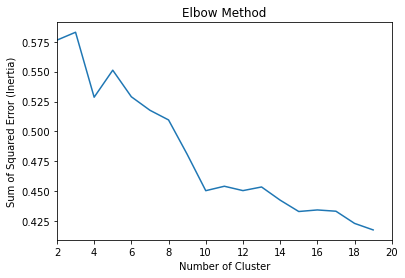

In [61]:
sil = []
for i in range(2,20):
  modelKM = KMeans(n_clusters=i)
  modelKM.fit(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1))
  y_pred = modelKM.predict(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1))
  sil.append(silhouette_score(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1), y_pred))

sns.lineplot(x=[i for i in range(2,20)], y=sil)
plt.xlim(2,20)
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.title('Elbow Method')

Text(0.5, 1.0, 'Elbow Method')

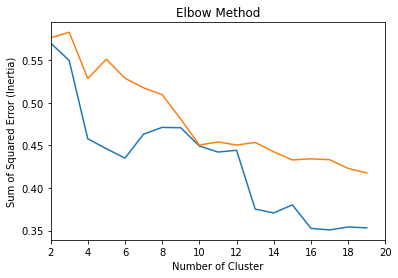

In [62]:
xxx = []
for i in range(2,20):
  modelKM = AC(n_clusters=i)
  y_pred = modelKM.fit_predict(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1))
  xxx.append(silhouette_score(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1), y_pred))

sns.lineplot(x=[i for i in range(2,20)], y=xxx)
sns.lineplot(x=[i for i in range(2,20)], y=sil)
plt.xlim(2,20)
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.title('Elbow Method')

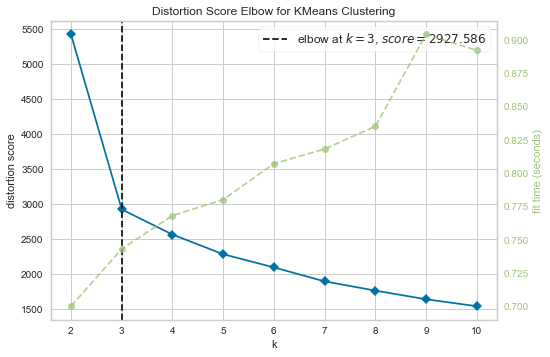

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
kev = KElbowVisualizer(model,k=10)
kev.fit(df_final)
kev.show()